In [ ]:
%pip install tensorflow
from google.colab import drive
drive.mount('/content/drive')

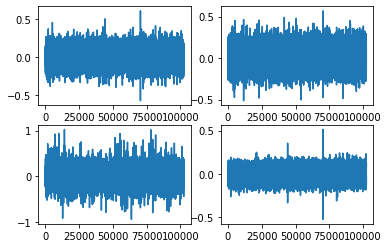

shape of the approximation low freq coeffs: (51201,)
approximation low freq coeffs: [-0.067 -0.049 -0.049 ...  0.112  0.003  0.074]
shape of the detail high freq coeffs: (51201,)
detail high freq coeffs: [-0.004  0.053 -0.042 ...  0.047 -0.058  0.059]

--- 3.3638877868652344 seconds ---


In [1]:
# this works fine about 54 - 96 seconds
import time
import os
import pywt
import numpy as np
import matplotlib.pyplot as plt

start_time = time.time()

# Set the path to the folder containing the text files
#folder_path = '/content/drive/MyDrive/Colab Notebooks/Bearing Dataset 2/2nd_test'
folder_path = '/content/drive/MyDrive/Colab Notebooks/Bearing Dataset 2/deneme'

# Get a list of all the text files in the folder and sort them in proper time order
file_list = [f for f in os.listdir(folder_path) if f.endswith('.txt')]
file_list = sorted(file_list)

# Load the contents of each text file (984 files in total) and save all the arrays in data
data = []
for file in file_list:
    file_path = os.path.join(folder_path, file)
    with open(file_path, 'r', encoding = 'utf8') as f:
        contents = np.array([x.strip().split() for x in f], float)
    data.append(contents)
    

# Concatenate the arrays in the data into a single (20152320, 4) NumPy array
data = np.concatenate(data)

# Split the data array into separate arrays for each column
bearing1 = data[:, 0]
bearing2 = data[:, 1]
bearing3 = data[:, 2]
bearing4 = data[:, 3]

# Create a figure and axis object
fig, ax = plt.subplots(2, 2)

# Plot the data
ax[0,0].plot(bearing1)
ax[0,1].plot(bearing2)
ax[1,0].plot(bearing3)
ax[1,1].plot(bearing4)

# Show the plot
plt.show()

''' Bu kısıma gerek kalmadı çünkü DWT 1D array ile de çalışabiliyor. cA ve cD'leri MATLAB'da 'db1' ve 'db2' için kontrol ettim, doğrular.
# Add the timeArray as a column to each array
timeArray = np.array(range(len(data)))
bearing1 = np.column_stack((timeArray, bearing1))
bearing2 = np.column_stack((timeArray, bearing2))
bearing3 = np.column_stack((timeArray, bearing3))
bearing4 = np.column_stack((timeArray, bearing4))
'''
'''
# Print the resulting NumPy array
print(data)
print(str(np.shape(data)))


np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
print("Bearing1:\n" + str(bearing1))
print("Bearing2:\n" + str(bearing2))
print("Bearing3:\n" + str(bearing3))
print("Bearing4:\n" + str(bearing4))
'''


np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
cA, cD = pywt.dwt(bearing1, 'db2')

print("shape of the approximation low freq coeffs: " + str(np.shape(cA)))
print("approximation low freq coeffs: " + str(cA))

print("shape of the detail high freq coeffs: " + str(np.shape(cD)))
print("detail high freq coeffs: " + str(cD))








print("\n--- %s seconds ---" % (time.time() - start_time))


In [ ]:
import numpy as np

bearing1 = data[:,0]

timeArray = np.array(range(102400))

#x_train_wavelet = [pywt.dwt2(x, 'db1')[0] for x in x_train]
bearing1 = np.column_stack((bearing1, timeArray))
print("bearing1\n" + str(bearing1))

#low_frequency_coeffs, high_frequency_coeffs = pywt.dwt2(bearing1,  'db1')

low_frequency_coeffs, high_frequency_coeffs = pywt.dwt2(bearing1, 'db1')
xtrain = pywt.dwt2(bearing1, 'db1')

print("low_frequency_coeffs\n" + str(low_frequency_coeffs))
print("high_frequency_coeffs\n" + str(high_frequency_coeffs))
print("xtrain\n" + str(xtrain))
print("len" + str(len(bearing1)))

In [ ]:
# Save the plot
fig.savefig('plot.png', dpi=300)